In [3]:
#библиотека для работы с данными, представляемыми в удобном виде датафреймов
import pandas as pd
#библиотека для отрисовки графиков
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
#библиотека для работы с векторами и матрицами  
import numpy as np

Рассмотрим данные о фильмах и их оценках пользователями.

Архив с датасетом можно скачать с сайта GroupLens:
http://files.grouplens.org/datasets/movielens/ml-100k.zip

Файл `u.data` содержит все оценки, а файл `u.item` — список всех фильмов, `u.user` - информацию о пользователях, проставивших оценки

In [4]:
#Reading users file:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols,encoding='latin-1')

In [5]:
print(users.shape)
users.head()

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
#Reading ratings file:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols,encoding='latin-1')

In [7]:
print(ratings.shape)
ratings.head()

(100000, 4)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Какие в среднем оценки имеют фильмы?

In [8]:
df = pd.DataFrame(ratings.groupby('movie_id')['rating'].mean())
df.head()

,rating
movie_id,
1,3.878319
2,3.206107
3,3.033333
4,3.550239
5,3.302326


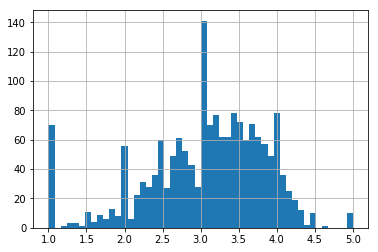

In [9]:
_ = df['rating'].hist(bins=50)

In [11]:
#Reading items file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('u.item', sep='|', names=i_cols,
encoding='latin-1')

In [12]:
print(items.shape)
items.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
n_users = ratings.user_id.unique().shape[0]
n_items = ratings.movie_id.unique().shape[0]

Варианты рекомендаций:
- Рекомендовать пользователю фильмы, понравившиеся похожим пользователям (collaborative filtering)
- Построить классификацию. Признаки - описание пользователя и фильма. Целевая переменная - понравится фильм или нет.
- Рекомендовать пользователю фильмы, похожие на те, которые он уже посмотрел

...



In [17]:
data_matrix = np.zeros((n_users, n_items))
for line in ratings.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]

Косинусное расстояние - мера близости векторов. Чем меньше, тем вектора ближе.

In [18]:
from sklearn.metrics.pairwise import pairwise_distances 
item_similarity = pairwise_distances(data_matrix.T, metric='cosine')

In [39]:
item_recommended = pd.DataFrame(data = item_similarity, columns=items['movie title'], index=items['movie title'])

In [40]:
item_recommended.head()

movie title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
movie title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0.000000,0.597618,0.669755,0.545062,0.713286,0.883656,0.379021,0.518886,0.503712,0.726065,...,0.964613,1.0,1.000000,1.000000,0.964613,1.0,1.0,1.0,0.952817,0.952817
GoldenEye (1995),0.597618,0.000000,0.726931,0.497429,0.681164,0.916437,0.616597,0.662998,0.744748,0.828918,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.921701,0.921701
Four Rooms (1995),0.669755,0.726931,0.000000,0.675134,0.787043,0.893278,0.627079,0.799206,0.726331,0.841896,...,1.000000,1.0,1.000000,1.000000,0.967708,1.0,1.0,1.0,1.000000,0.903125
Get Shorty (1995),0.545062,0.497429,0.675134,0.000000,0.665761,0.909692,0.510717,0.509764,0.580956,0.747439,...,1.000000,1.0,0.905978,0.905978,0.962391,1.0,1.0,1.0,0.943587,0.924782
Copycat (1995),0.713286,0.681164,0.787043,0.665761,0.000000,0.962701,0.665231,0.740839,0.727552,0.944547,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.905789


In [41]:
def find_top_similar(film_name):
    for i in ((test[film_name].sort_values()[1:7]).reset_index()['movie title']):
        print(i)

<img src="Schindler's_List_movie.jpg" width="220">


In [42]:
find_top_similar('''Schindler's List (1993)''')

Forrest Gump (1994)
Shawshank Redemption, The (1994)
Dances with Wolves (1990)
E.T. the Extra-Terrestrial (1982)
When Harry Met Sally... (1989)
Raiders of the Lost Ark (1981)


   <tr>
    <td> <img src="Forrest.jpg" alt="Drawing" style="width: 300px;"/> </td>
    <td> <img src="large_9O7gLzmreU0nGkIB6K3BsJbzvNv.jpg" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="Dances-with-Wolves-e1497559228641.jpg" alt="Drawing" style="width: 250px;"/> </td>
    
    </tr>

In [ ]:
Посмотрим ещё один фильм

<img src="b7n6U8WtNLgmcGruGu5FCIgGYHg.jpg" width="220">

In [48]:
find_top_similar('Babe (1995)')

Back to the Future (1985)
Raiders of the Lost Ark (1981)
E.T. the Extra-Terrestrial (1982)
Empire Strikes Back, The (1980)
Princess Bride, The (1987)
Forrest Gump (1994)


   <tr>
    <td> <img src="8fluiiTRgYGktgRnVwciuwEFmAH.jpg" alt="Drawing" style="width: 300px;"/> </td>
    <td> <img src="44sKJOGP3fTm4QXBcIuqu0RkdP7.jpg" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="w6pTVA8ylH6cfaJMA8fZGgtWUi4.jpg" alt="Drawing" style="width: 250px;"/> </td>
    
    </tr>